In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Part 1: Implementing K-means clustering algorithm

In [3]:
# Load the data
file_path = 'cluster_data1.csv'  
data = pd.read_csv(file_path)

In [4]:
data.head(5)

,X1,X2,X3,X4
0,6.7,3.0,5.0,1.7
1,6.3,2.9,5.6,1.8
2,5.6,3.0,4.5,1.5
3,7.6,3.0,6.6,2.1
4,6.0,3.4,4.5,1.6


In [5]:
data.shape

(150, 4)

In [6]:
# Prepare the data (X1, X2, X3, X4)
X = data[['X1', 'X2', 'X3', 'X4']].values  # Convert to NumPy array

In [7]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

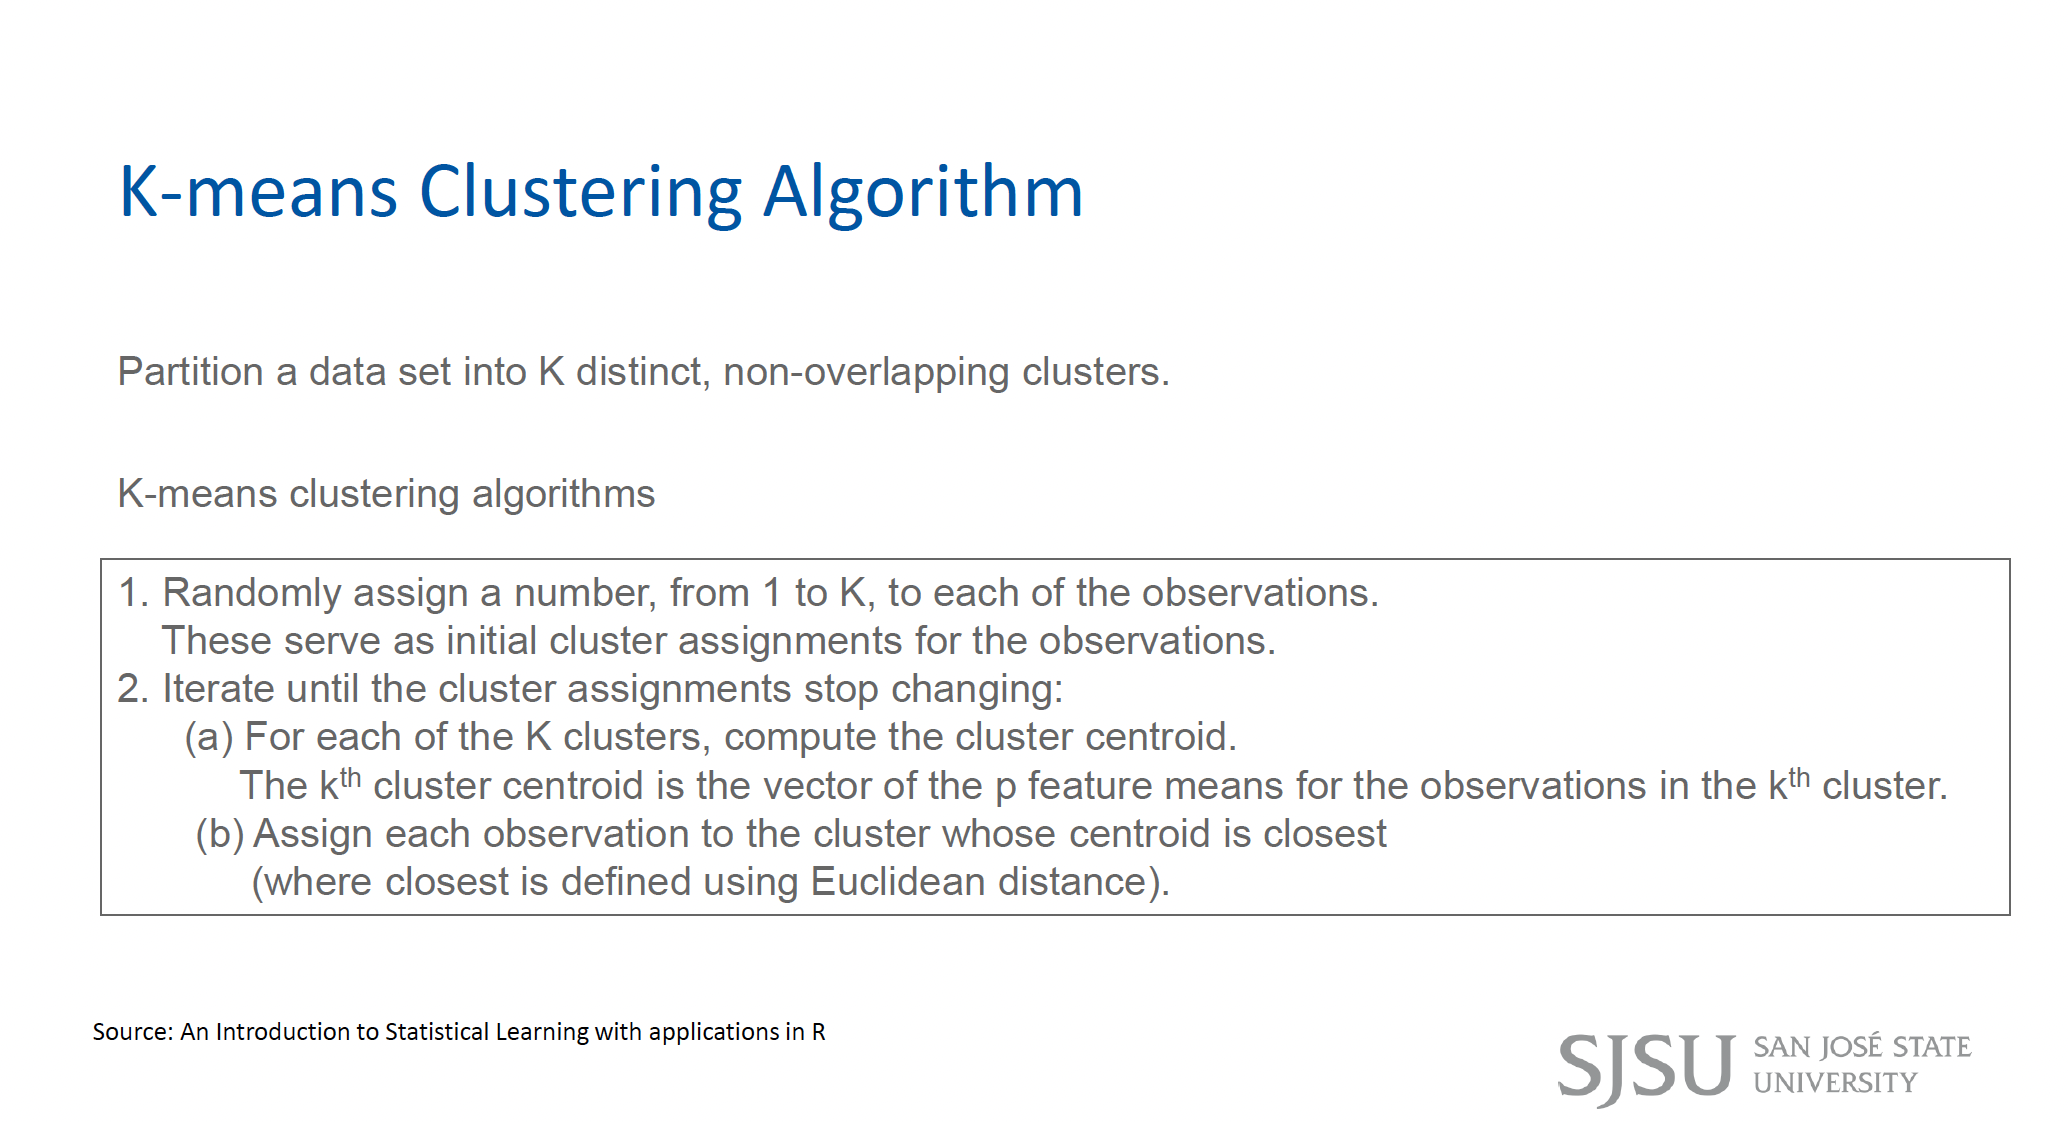

In [9]:
def k_means(X, K, max_iters=5):
    np.random.seed(123)  ## random seed as ‘123’
    # Randomly initialize the centroids
    centroids = X[np.random.choice(X.shape[0], K, replace=False)]
    centroids_history = [centroids.copy()]  # Store centroids for plotting
    clusters_history = []  # Store clusters for plotting

    for _ in range(max_iters):
        # Assign clusters
        distances = np.array([[euclidean_distance(x, c) for c in centroids] for x in X])
        clusters = np.argmin(distances, axis=1)
        clusters_history.append(clusters.copy())  # Store cluster assignments
        
        # Compute new centroids
        new_centroids = np.array([X[clusters == k].mean(axis=0) for k in range(K)])
        centroids_history.append(new_centroids.copy())
        
        # Check for convergence (if centroids do not change)
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids

    return clusters_history, centroids_history

In [10]:
def plot_kmeans_subplots(centroids_history, clusters_history, K):
    fig, axs = plt.subplots(2, 3, figsize=(18, 12))
    colors = ['r', 'g', 'b', 'y', 'c', 'm', 'orange']

    # Plot the data points for iteration 0
    axs[0, 0].scatter(X[:, 0], X[:, 1], color='gray', alpha=0.6, label='Data Points')
    axs[0, 0].scatter(centroids_history[0][:, 0], centroids_history[0][:, 1], marker='x', color='k', s=200, label='Centroids')
    axs[0, 0].set_title('Iteration 0')
    axs[0, 0].set_xlabel('X1')
    axs[0, 0].set_ylabel('X2')
    axs[0, 0].legend()

    for step in range(1, len(centroids_history)):
        ax = axs.flatten()[step]
        # Plot clusters and centroids
        for i in range(K):
            cluster = X[clusters_history[step - 1] == i]  # Get points for cluster i
            ax.scatter(cluster[:, 0], cluster[:, 1], color=colors[i], label=f'Cluster {i + 1}', alpha=0.6)
            
            # Plot centroids with the same color as the cluster
            ax.scatter(centroids_history[step][i, 0], centroids_history[step][i, 1], marker='x', color=colors[i], s=200, label=f'Centroid {i + 1}')

        ax.set_title(f'Iteration {step}')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.legend()

    plt.tight_layout()
    plt.show()

In [11]:
# Set K = 3 for clustering
K = 3

In [12]:
# Run the K-means algorithm for 5 iterations
clusters_history, centroids_history = k_means(X, K, max_iters=4)

In [13]:
# Print the centroid values for each iteration
for i, centroids in enumerate(centroids_history):
    print(f"Centroids after iteration {i}:\n{centroids}\n")

Centroids after iteration 0:
[[5.2 3.5 1.5 0.2]
 [4.8 3.4 1.9 0.2]
 [7.2 3.6 6.1 2.5]]

Centroids after iteration 1:
[[5.16764706 3.55588235 1.45588235 0.25588235]
 [5.17948718 2.80769231 2.88205128 0.77948718]
 [6.47792208 2.95714286 5.21948052 1.82727273]]

Centroids after iteration 2:
[[5.006      3.418      1.464      0.244     ]
 [5.48888889 2.52777778 3.76111111 1.14444444]
 [6.43170732 2.94756098 5.15731707 1.79268293]]

Centroids after iteration 3:
[[5.006      3.418      1.464      0.244     ]
 [5.58       2.63333333 3.98666667 1.23333333]
 [6.55428571 2.97428571 5.3        1.86571429]]

Centroids after iteration 4:
[[5.006      3.418      1.464      0.244     ]
 [5.67222222 2.67222222 4.075      1.26388889]
 [6.59375    2.984375   5.3734375  1.9078125 ]]



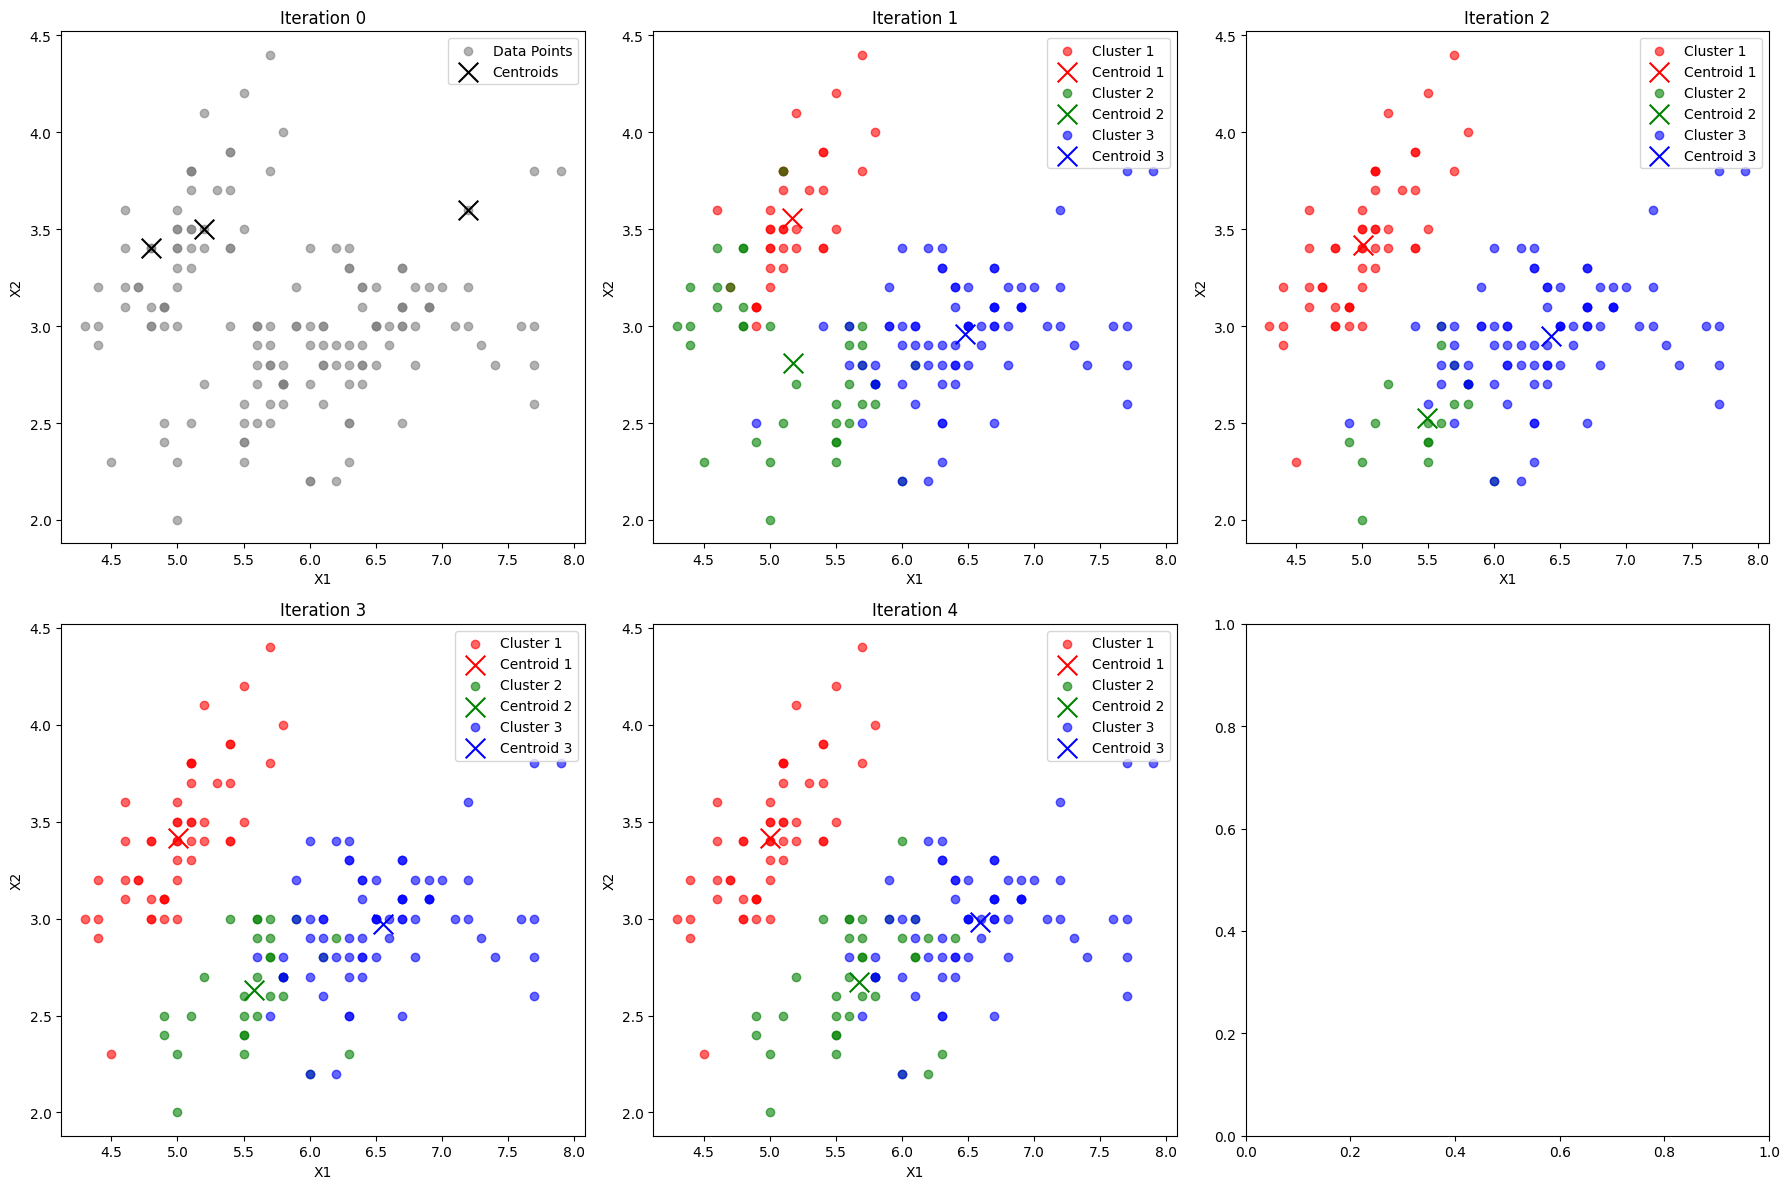

In [14]:
# Plot using subplots for iterations 0 to 4
plot_kmeans_subplots(centroids_history, clusters_history, K)

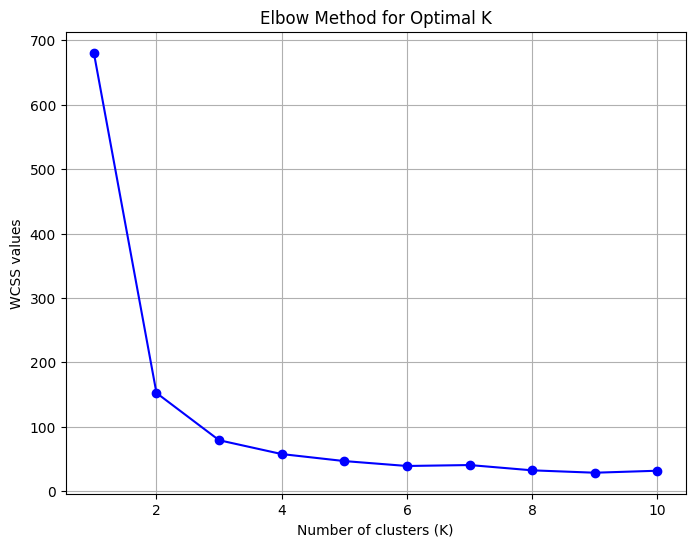

In [15]:
# Function to compute the Euclidean distance between two points
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

# Function to compute the WCSS (Within-Cluster Sum of Squares)
def compute_wcss(data, K_range):
    wcss = []
    for K in K_range:
        centroids = data.sample(n=K).values  # Randomly initialize centroids
        for _ in range(10):  # Run for 10 iterations to refine centroids
            clusters = [[] for _ in range(K)]
            for point in data.values:
                distances = [euclidean_distance(point, centroid) for centroid in centroids]
                closest_centroid_idx = np.argmin(distances)
                clusters[closest_centroid_idx].append(point)
            # Recompute centroids
            centroids = np.array([np.mean(cluster, axis=0) if cluster else centroids[i] for i, cluster in enumerate(clusters)])
        
        # Calculate WCSS
        wcss_k = 0
        for i in range(K):
            if len(clusters[i]) > 0:
                wcss_k += np.sum((np.array(clusters[i]) - centroids[i]) ** 2)
        wcss.append(wcss_k)
    
    return wcss

# Load the data
file_path = 'cluster_data1.csv'  
data = pd.read_csv(file_path)

# Prepare the data (X1, X2, X3, X4)
X = data[['X1', 'X2', 'X3', 'X4']]  

# Compute WCSS for K values from 1 to 10
K_values = range(1, 11)
wcss_values = compute_wcss(X, K_values)

# Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(K_values, wcss_values, marker='o', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS values')
plt.grid(True)
plt.show()

#### In this graph, the elbow appears to be around K=3. After this point, the decrease in WCSS slows considerably, forming an "elbow" shape. This suggests that 3 might be an optimal number of clusters for this dataset. The method is called the "Elbow Method" because the optimal K often appears at the "elbow" of the curve, where the rate of decrease sharply changes.

## Part 2. Implementing K-means++ clustering algorithm and finding K

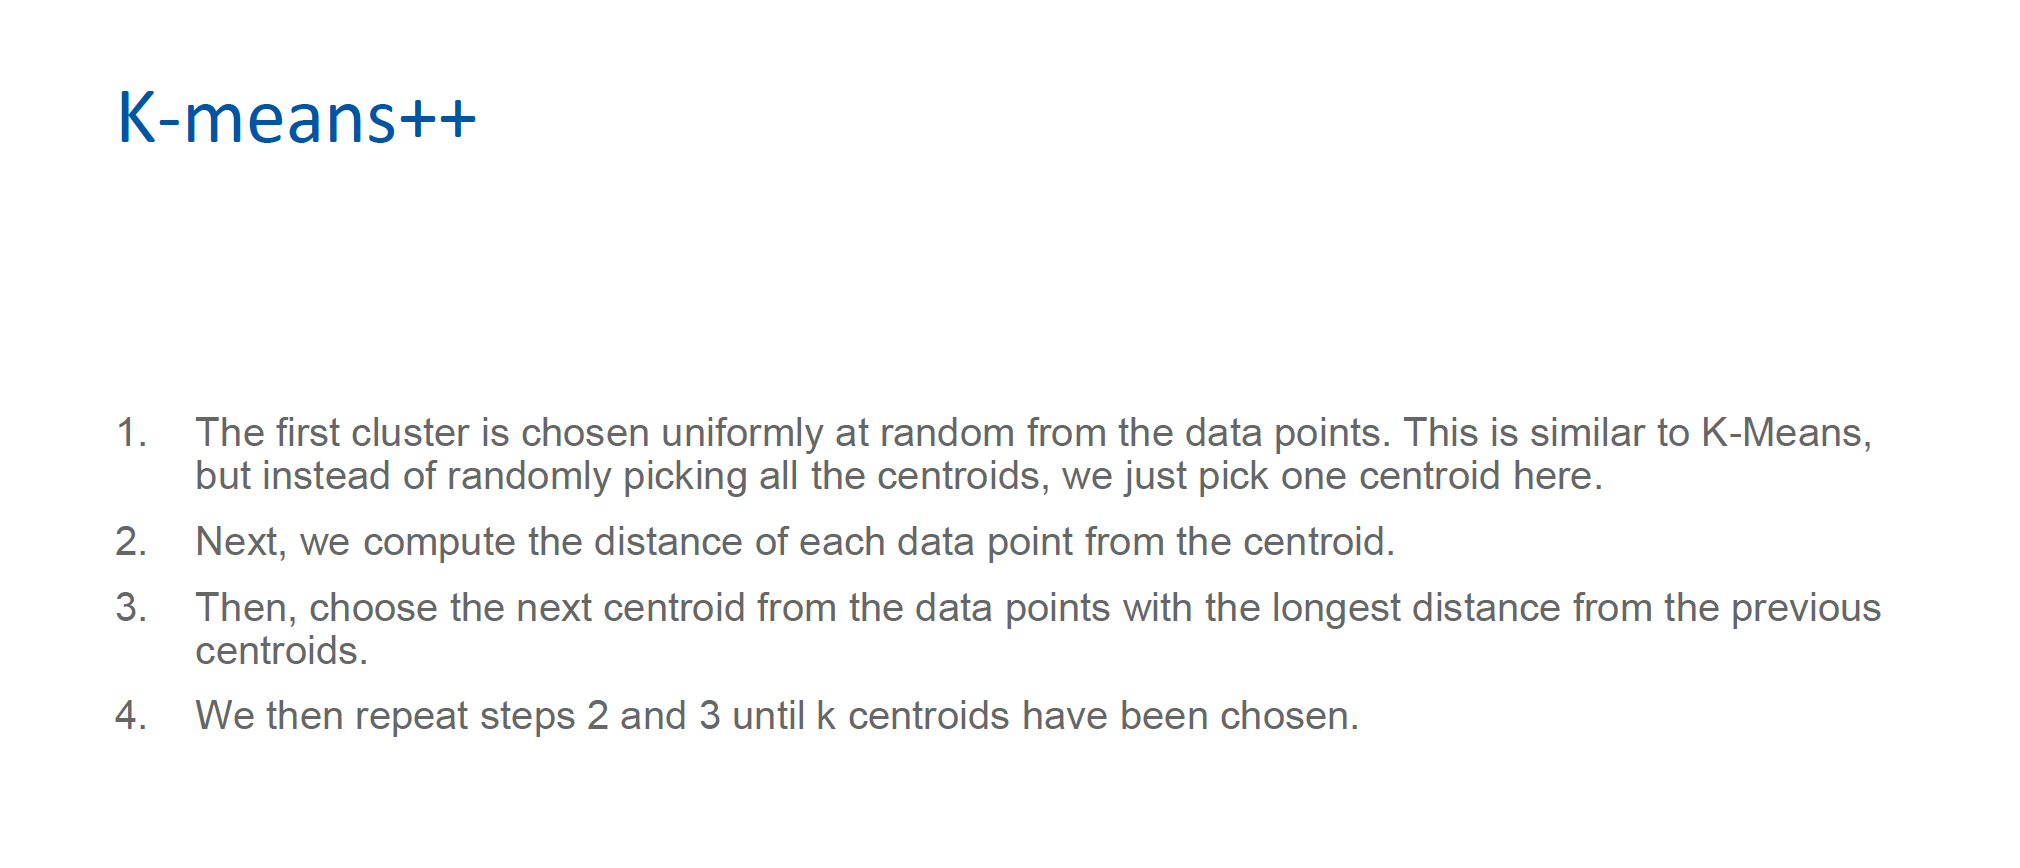

In [19]:
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

In [20]:
def initialize_centroids(data, k):
    centroids = [data[np.random.randint(data.shape[0])]]
    
    for _ in range(1, k):
        distances = np.array([min([euclidean_distance(point, cent) for cent in centroids]) for point in data])
        new_centroid_idx = np.argmax(distances)
        centroids.append(data[new_centroid_idx])
    
    return np.array(centroids)

def assign_clusters(data, centroids):
    clusters = []
    for point in data:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(data, clusters, k):
    new_centroids = []
    for i in range(k):
        cluster_points = data[clusters == i]
        if len(cluster_points) > 0:
            new_centroid = cluster_points.mean(axis=0)
            new_centroids.append(new_centroid)
        else:
            new_centroids.append(centroids[i])
    return np.array(new_centroids)

In [21]:
def plot_step(data, centroids, clusters=None, step=None, iteration=None):
    plt.figure(figsize=(10, 8))
    
    if clusters is None:
        plt.scatter(data[:, 0], data[:, 1], c='blue', alpha=0.5, label='Data points')
    else:
        plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', alpha=0.5, label='Data points')
    
   
    colors = ['red', 'green', 'purple', 'orange', 'cyan']  
    for i, centroid in enumerate(centroids):
        color = colors[i % len(colors)]  
        plt.scatter(centroid[0], centroid[1], c=color, marker='x', s=200, linewidths=3, label=f'Centroid {i+1}')
        plt.annotate(f'Centroid {i+1}', (centroid[0], centroid[1]), xytext=(5, 5), 
                     textcoords='offset points', fontsize=12, color=color)
    
    plt.xlabel('X1')
    plt.ylabel('X2')
    
    if step is not None:
        plt.title(f'Step {step}: Centroids after selection')
    elif iteration is not None:
        plt.title(f'K-means++ Iteration {iteration}')
    
    plt.grid(True)
    plt.legend(loc='upper right') 
    plt.show()

In [22]:
# Load and prepare the data
data = np.loadtxt('cluster_data1.csv', delimiter=',', skiprows=1)
X = data  # Use all features

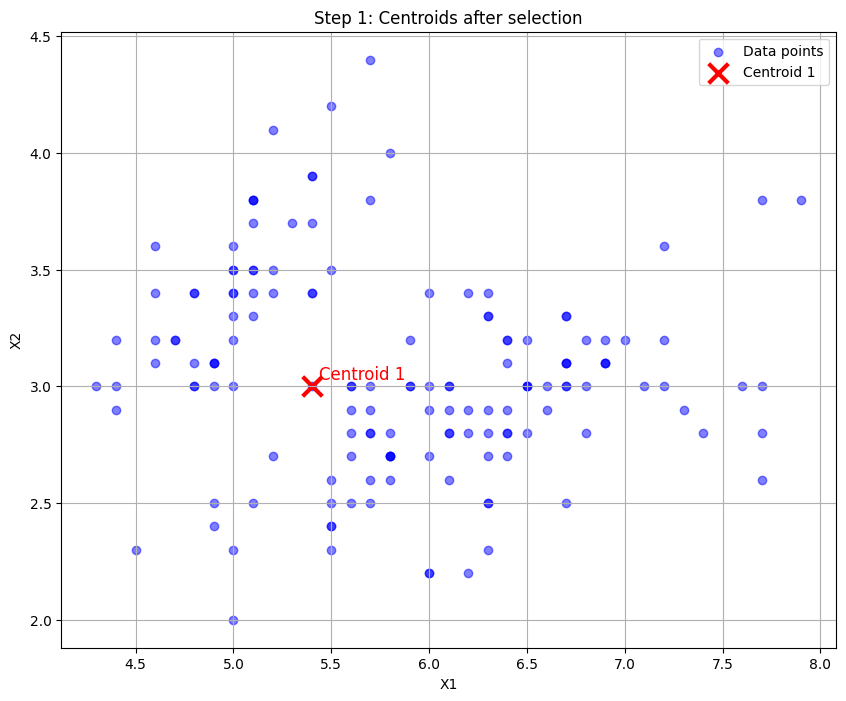

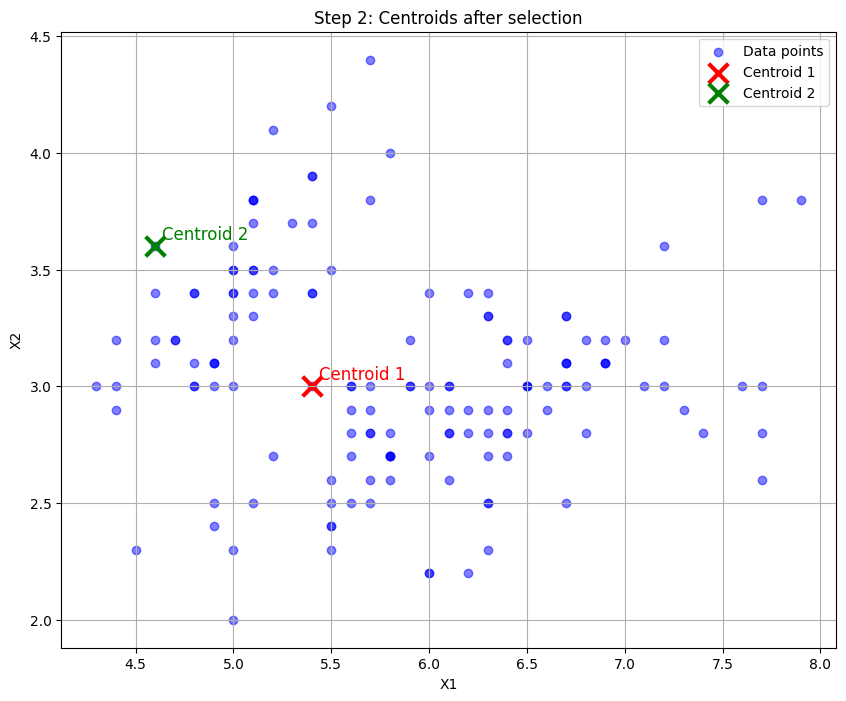

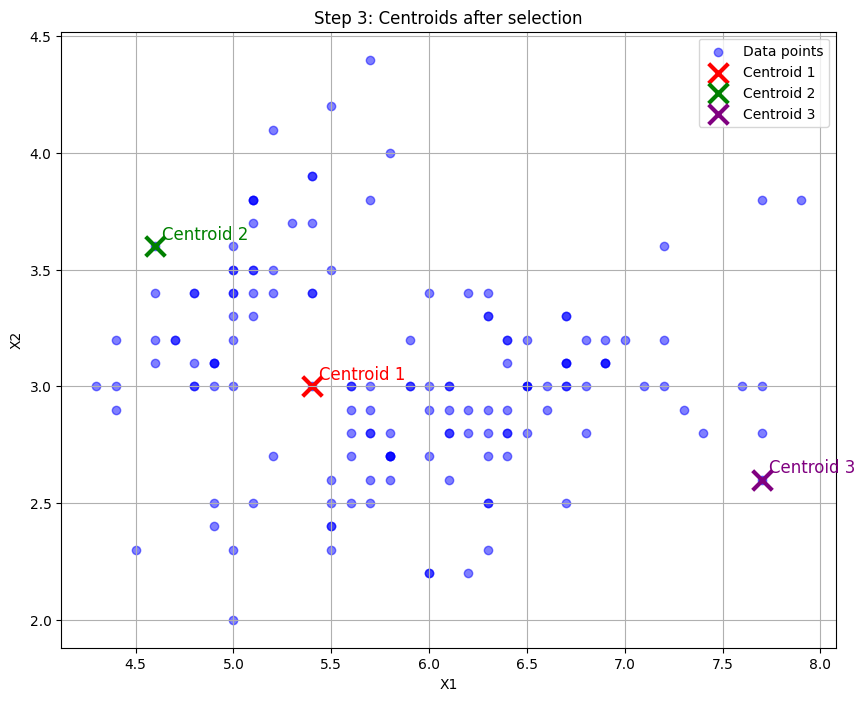

In [23]:
# K-means++ Initialization
k = 3
centroids = initialize_centroids(X, k)

# Plot initialization steps
plot_step(X[:, :2], centroids[:1, :2], step=1)  # Plot only the first centroid in Step 1
plot_step(X[:, :2], centroids[:2, :2], step=2)  # Plot the first two centroids in Step 2
plot_step(X[:, :2], centroids[:, :2], step=3)   # Plot all three centroids in Step 3

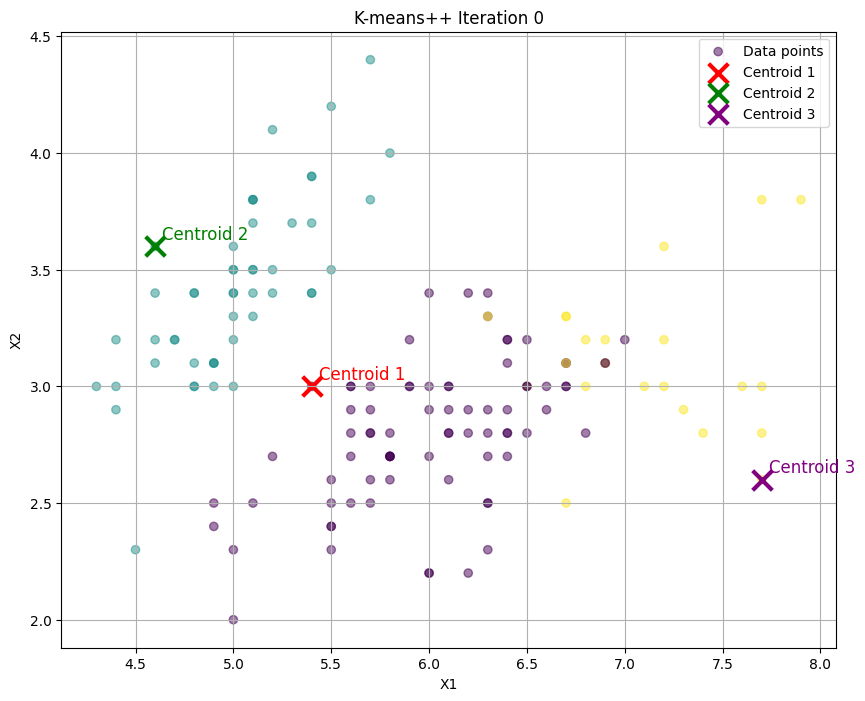

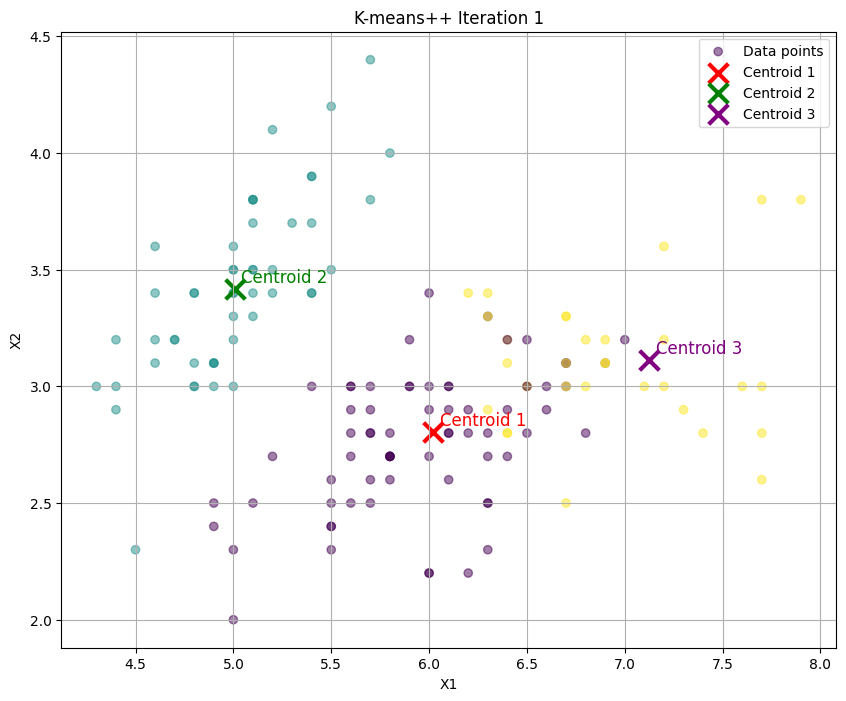

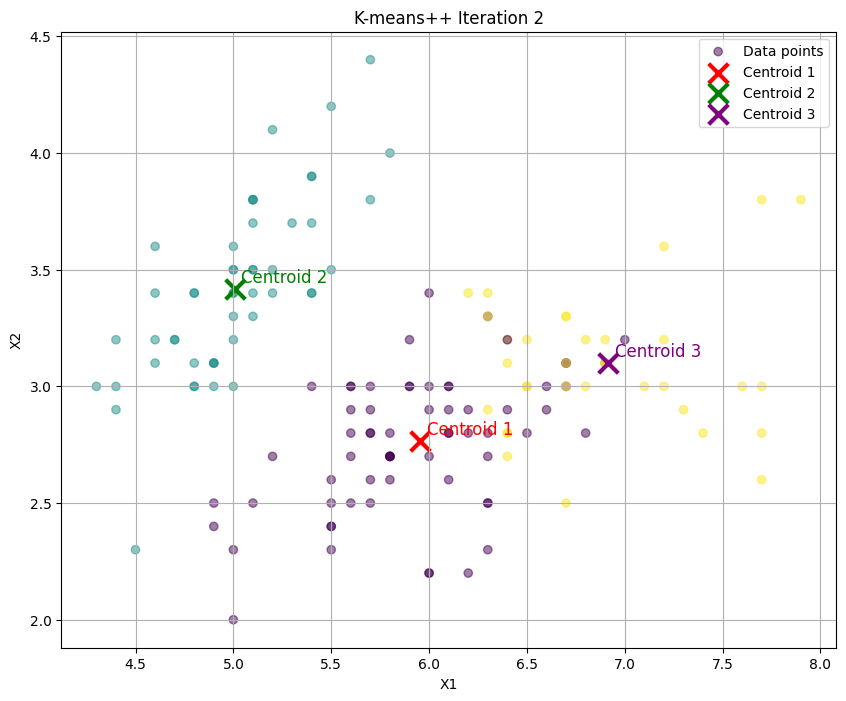

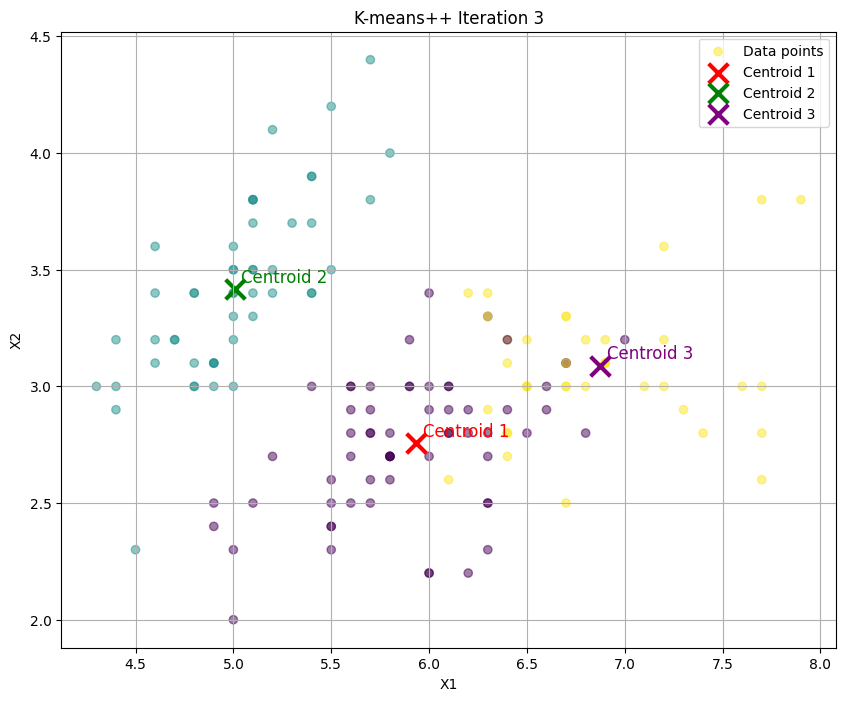

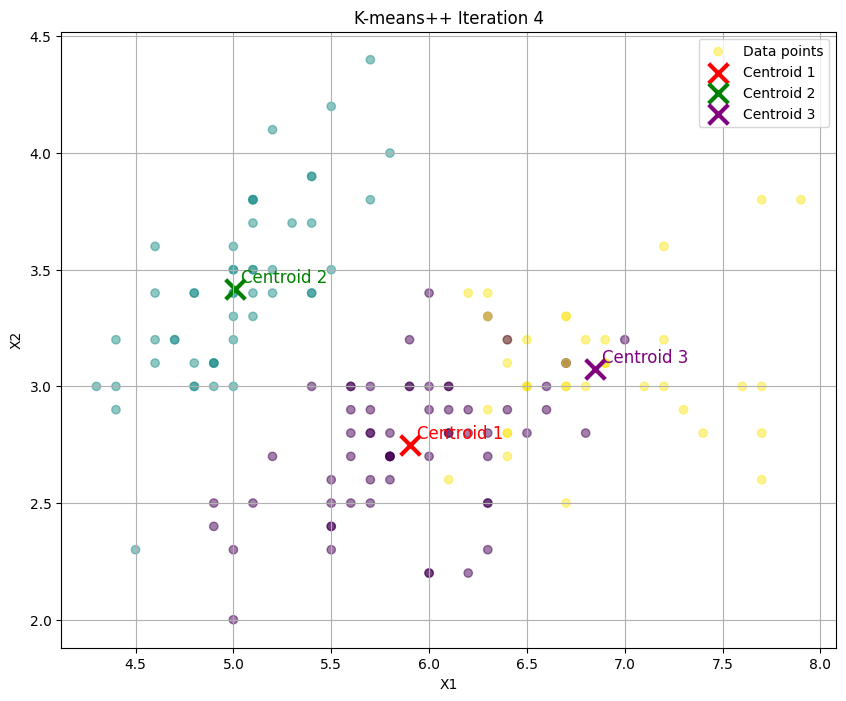

In [24]:
# K-means++ iterations
for iteration in range(5):  # Show iterations 0 to 4
    clusters = assign_clusters(X, centroids)
    plot_step(X[:, :2], centroids[:, :2], clusters, iteration=iteration)
    centroids = update_centroids(X, clusters, k)

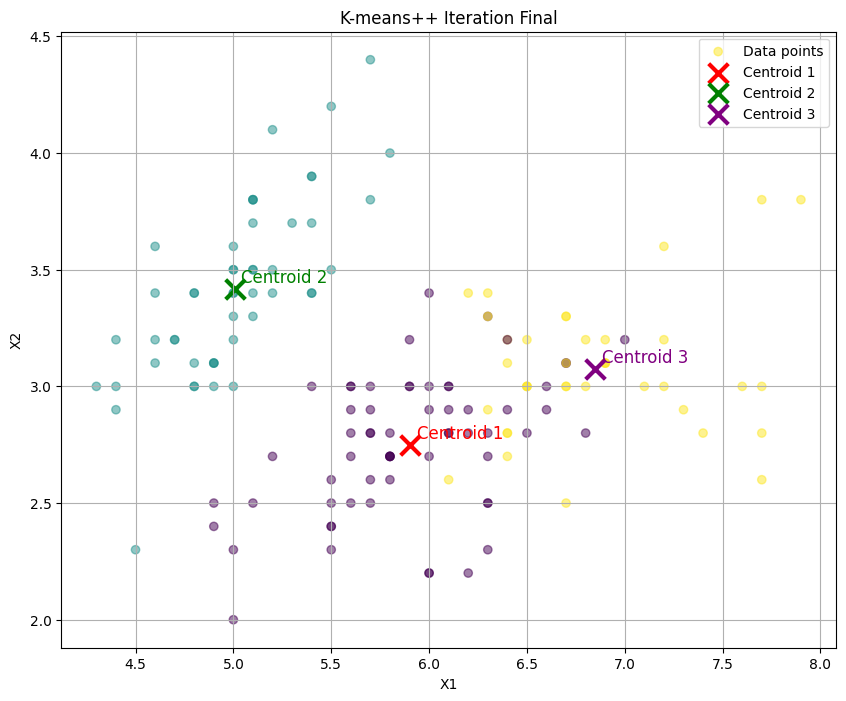

In [25]:
# Final results
final_clusters = assign_clusters(X, centroids)
plot_step(X[:, :2], centroids[:, :2], final_clusters, iteration="Final")

In [26]:
print("Final centroids:")
print(centroids)

Final centroids:
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [27]:
print("\nCluster assignments:")
print(final_clusters)


Cluster assignments:
[2 2 0 2 0 2 2 1 1 1 0 0 0 0 0 1 1 2 1 1 2 0 0 1 0 1 2 1 1 0 2 1 1 1 0 0 0
 0 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 2 0 0 2 1 2 1 0 1 1 1 2 1 2
 1 0 0 2 0 0 1 0 2 2 2 2 1 0 0 0 1 1 0 0 2 0 0 0 0 0 2 2 2 1 2 0 2 0 0 0 1
 2 1 2 1 2 0 0 2 2 1 2 0 2 2 1 1 0 0 0 1 1 2 0 2 0 0 1 1 0 0 2 0 2 0 1 1 2
 1 1]


In [28]:
# Save cluster assignments and data to CSV
def save_clusters_to_csv(data, clusters, centroids, file_name='clustered_data.csv'):
    column_names = [f'X{i+1}' for i in range(data.shape[1])]
    df = pd.DataFrame(data, columns=column_names)
    df['Cluster'] = clusters  # Add a column for cluster labels
    df.to_csv(file_name, index=False)
    print(f"Cluster assignments saved to {file_name}")

    centroid_columns = [f'Centroid_X{i+1}' for i in range(centroids.shape[1])]
    centroids_df = pd.DataFrame(centroids, columns=centroid_columns)
    centroids_df.to_csv('centroids.csv', index=False)
    print("Centroids saved to centroids.csv")

save_clusters_to_csv(X, final_clusters, centroids)

Cluster assignments saved to clustered_data.csv
Centroids saved to centroids.csv


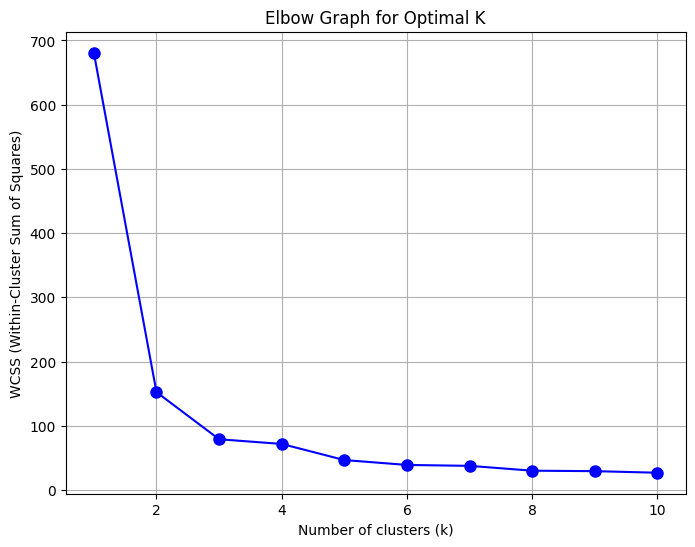

In [29]:
def calculate_wcss(data, centroids, clusters):
    """Calculate the Within-Cluster Sum of Squares (WCSS)."""
    wcss = 0
    for i, centroid in enumerate(centroids):
        cluster_points = data[clusters == i]
        wcss += np.sum((cluster_points - centroid) ** 2)
    return wcss

def plot_elbow_graph(data, max_k=10):
    wcss_values = []
    k_values = list(range(1, max_k+1))
    
    for k in k_values:
        # Initialize centroids using K-means++ method
        centroids = initialize_centroids(data, k)
        # Assign clusters and update centroids until convergence
        for iteration in range(10):  # Limit iterations for convergence
            clusters = assign_clusters(data, centroids)
            centroids = update_centroids(data, clusters, k)
        
        # Calculate WCSS (Within-Cluster Sum of Squares)
        wcss = calculate_wcss(data, centroids, clusters)
        wcss_values.append(wcss)
    
    # Plot the Elbow Graph
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, wcss_values, 'bo-', markersize=8)
    plt.title('Elbow Graph for Optimal K')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
    plt.grid(True)
    plt.show()

#  call the function to plot the Elbow graph
plot_elbow_graph(X, max_k=10)

#### The "elbow" in the graph is the point where adding more clusters doesn't significantly reduce WCSS. This point represents a good balance between the number of clusters and their compactness. In this graph, the elbow appears around K=3 or K=4. After this point, the rate of decrease in WCSS slows considerably, forming an "elbow" shape. This suggests that 3 or 4 might be an optimal number of clusters for this dataset. The method is called the "Elbow Method" because the optimal K often appears at the "elbow" of the curve, where the rate of decrease sharply changes.

## Part 3: Implementing KNN classification

K-Nearest Neighbor (KNN) algorithm:

1. The KNN algorithm is a simple, easy-to-implement supervised machine learning algorithm.
2. It can be used to solve both classification and regression problems

In [33]:
# Step 1: Load the clustered data, centroids, and new dataset
clustered_data = pd.read_csv('clustered_data.csv')  # Load clustered data
centroids = pd.read_csv('centroids.csv')  # Load centroids
new_data = pd.read_csv('cluster_data2.csv')  # Load new dataset

In [34]:
# Extract feature values and cluster labels
X = clustered_data.iloc[:, :-1].values  # Use all features except cluster labels
clusters = clustered_data['Cluster'].values  # Cluster labels
new_X = new_data.values  # New data features

In [35]:
# Check loaded data
print("Clustered Data Loaded Successfully:")
print(clustered_data.head())
print("\nCentroids Loaded Successfully:")
print(centroids.head())
print("\nNew Data Loaded Successfully:")
print(new_data.head())

Clustered Data Loaded Successfully:
    X1   X2   X3   X4  Cluster
0  6.7  3.0  5.0  1.7        2
1  6.3  2.9  5.6  1.8        2
2  5.6  3.0  4.5  1.5        0
3  7.6  3.0  6.6  2.1        2
4  6.0  3.4  4.5  1.6        0

Centroids Loaded Successfully:
   Centroid_X1  Centroid_X2  Centroid_X3  Centroid_X4
0     5.901613     2.748387     4.393548     1.433871
1     5.006000     3.418000     1.464000     0.244000
2     6.850000     3.073684     5.742105     2.071053

New Data Loaded Successfully:
     X1    X2    X3    X4
0  5.21  3.65  1.42  0.25
1  5.07  3.41  1.43  0.19
2  5.85  2.65  4.14  1.27
3  5.64  2.73  4.03  1.23
4  6.55  2.90  5.54  2.05


In [36]:
new_data.head(5)

,X1,X2,X3,X4
0,5.21,3.65,1.42,0.25
1,5.07,3.41,1.43,0.19
2,5.85,2.65,4.14,1.27
3,5.64,2.73,4.03,1.23
4,6.55,2.90,5.54,2.05


In [83]:
clustered_data.shape

(150, 5)

In [85]:
centroids.shape

(3, 4)

In [37]:
new_data.shape

(15, 4)

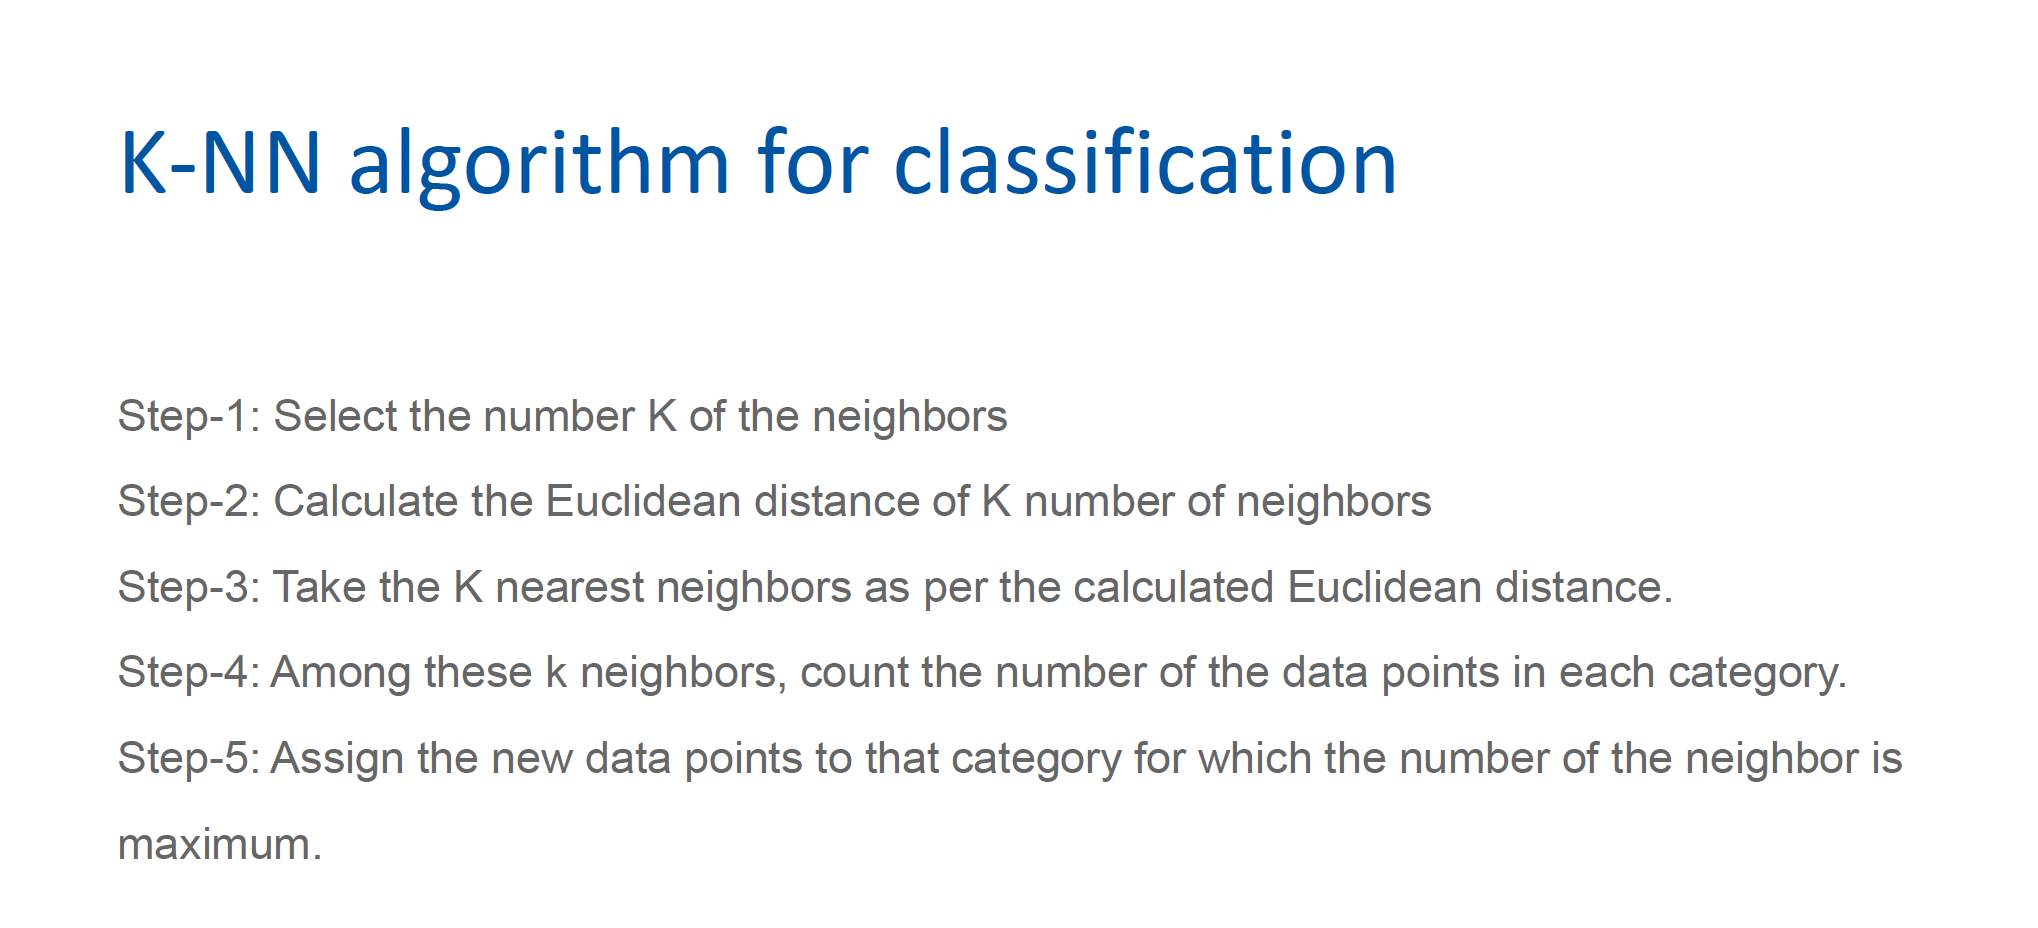

In [39]:
# Euclidean distance function
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2)) 

In [40]:
# K-NN Classification function
def knn_classify(new_point, data, labels, k=3):
    distances = [euclidean_distance(new_point, point) for point in data]
    sorted_indices = np.argsort(distances)
    top_k = [labels[i] for i in sorted_indices[:k]]
    majority_label = max(set(top_k), key=top_k.count)
    return majority_label

In [41]:
# Apply K-NN to classify new data points
def apply_knn(new_data, data, labels, k=3):
    knn_predictions = []
    for i in range(len(new_data)):
        knn_predictions.append(knn_classify(new_data[i], data, labels, k=k))
    return np.array(knn_predictions)

In [42]:
# Apply K-NN classification to each new data point using cluster labels from K-means
k = 3  # Number of nearest neighbors
knn_results = apply_knn(new_X, X, clusters, k=k)

In [43]:
# Add K-NN results to new data
new_data['KNN_Class'] = knn_results  # Add KNN results as a new column
new_data.to_csv('knn_classified_new_data.csv', index=False)
print("K-NN classification results for new data saved to knn_classified_new_data.csv")

K-NN classification results for new data saved to knn_classified_new_data.csv


In [44]:
knn_results_df = pd.read_csv('knn_classified_new_data.csv') 
knn_results_df

,X1,X2,X3,X4,KNN_Class
0,5.21,3.65,1.42,0.25,1
1,5.07,3.41,1.43,0.19,1
2,5.85,2.65,4.14,1.27,0
3,5.64,2.73,4.03,1.23,0
4,6.55,2.90,5.54,2.05,2
5,5.83,2.75,4.27,1.34,0
6,4.86,3.31,1.45,0.22,1
7,6.63,2.96,5.50,1.93,2
8,5.01,3.39,1.55,0.27,1
9,6.45,3.03,5.33,2.17,2


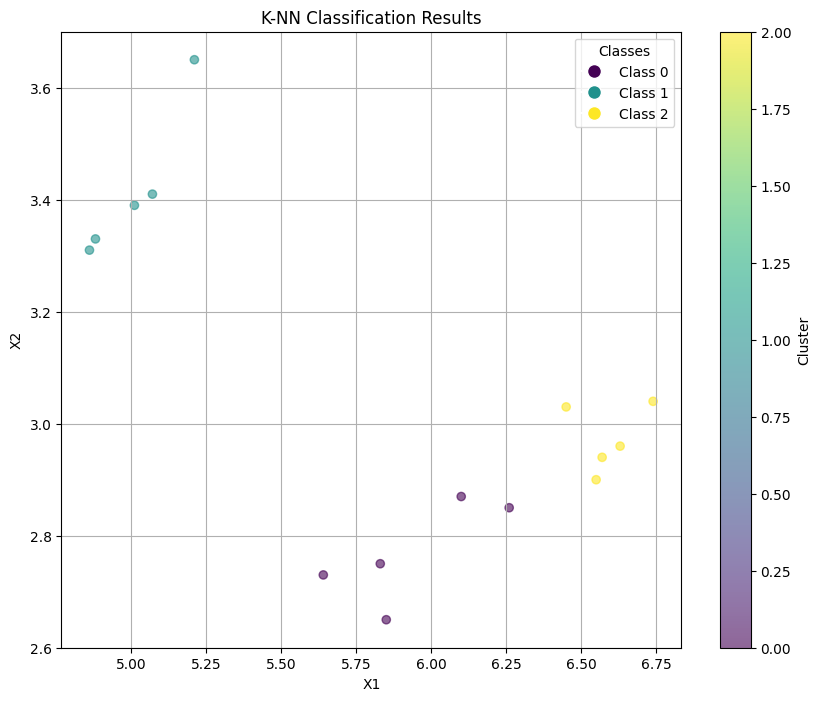

In [45]:
# Function to plot K-NN results with labels
def plot_knn_results(data, knn_predictions, title='K-NN Classification Results'):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=knn_predictions, cmap='viridis', alpha=0.6)

    # Create a legend for the classes
    unique_classes = np.unique(knn_predictions)
    class_labels = [f'Class {int(label)}' for label in unique_classes]
    
    # Add legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=scatter.cmap(scatter.norm(label)), markersize=10) for label in unique_classes]
    plt.legend(handles, class_labels, title="Classes")

    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.colorbar(label='Cluster')
    plt.grid(True)
    plt.show()

# Plot K-NN classification results
plot_knn_results(new_data, knn_results)